# File for quick check of biotron data logger information

##Import components

In [1]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

##Bring data in to Pandas dataframe

In [2]:
BiotronEnvironmentals=pd.read_csv('C:\Campbellsci\LoggerNet\CR1000_PotTables.dat', #specify file path for data to read in
                         parse_dates=True, #tell the function to parse date columns to datetime formats
                         skiprows = [0,2,3,4], #leave out rows 1, 3 and 4 which have redundant information
                         index_col = 0, #Use the first column, which is Date, as an index
                         )
BiotronDailysMeans=BiotronEnvironmentals.resample('D').mean()

In [3]:
BiotronEnvironmentals

,RECORD,BattV_Avg,PTemp_C_Avg,T107_C,WP_Avg(1),WP_Avg(2),WP_Avg(3),WP_Avg(4),MeanWP_Avg,DeltaT_C_Avg(1),DeltaT_C_Avg(2),DeltaT_C_Avg(3),DeltaT_C_Avg(4),LastGoodValue_Avg(1),LastGoodValue_Avg(2),LastGoodValue_Avg(3),LastGoodValue_Avg(4)
TIMESTAMP,,,,,,,,,,,,,,,,,
2017-12-17 17:00:00,1,13.94,31.46,27.830,2.274,2.848,2.416,2.278,2.454,0.822,1.047,0.882,0.823,2.274,2.848,2.416,2.278
2017-12-17 17:20:00,2,13.95,31.70,25.620,2.209,2.818,2.388,2.289,2.426,0.792,1.036,0.870,0.827,2.209,2.818,2.388,2.289
2017-12-17 17:40:00,3,13.95,31.18,25.390,2.187,3.010,2.378,2.288,2.466,0.783,1.102,0.866,0.828,2.187,3.010,2.378,2.288
2017-12-17 18:00:00,4,13.94,30.62,24.920,2.183,3.172,2.371,2.236,2.490,0.781,1.154,0.863,0.805,2.183,3.172,2.371,2.236
2017-12-17 18:20:00,5,13.95,29.92,24.370,2.231,3.368,2.383,2.212,2.548,0.803,1.214,0.868,0.794,2.231,3.368,2.383,2.212
2017-12-17 18:40:00,6,13.95,29.62,24.670,2.189,3.545,2.329,2.224,2.572,0.784,1.265,0.845,0.799,2.189,3.545,2.329,2.224
2017-12-17 19:00:00,7,13.95,29.38,24.310,2.237,3.697,2.380,2.218,2.633,0.805,1.307,0.867,0.797,2.237,3.697,2.380,2.218
2017-12-17 19:20:00,8,13.95,28.77,22.990,2.267,3.933,2.440,2.302,2.735,0.818,1.369,0.892,0.834,2.267,3.933,2.440,2.302
2017-12-17 19:40:00,9,13.93,28.15,22.300,2.258,4.082,2.428,2.292,2.765,0.814,1.407,0.887,0.829,2.258,4.082,2.428,2.292


##Check rows and columns look ok

##Extract pot water data into data frame for the period we want to look at

In [4]:
from datetime import timedelta #Import function needed for doing date deltas 
EndDate = BiotronEnvironmentals.index.max(axis=0)  #Set end of series as most recent date in file
EndDateString = EndDate.strftime("%Y-%m-%d")  #Turn this to a string
PlotDuration = 1                            #Set the duration that you want to graph for
StartDate = EndDate - timedelta(weeks=PlotDuration)       #Set start date the specified duration before the end date 
StartDateString = StartDate.strftime("%Y-%m-%d")           #Turn that into a string
PotWater = BiotronEnvironmentals.loc[:,#StartDateString:EndDateString,                     #create the dateframe for the specified period 
                                    [X for X in BiotronEnvironmentals if 'WP' in X]]   #inserting only the colunms containing water potential data

##Graph pot water content signals

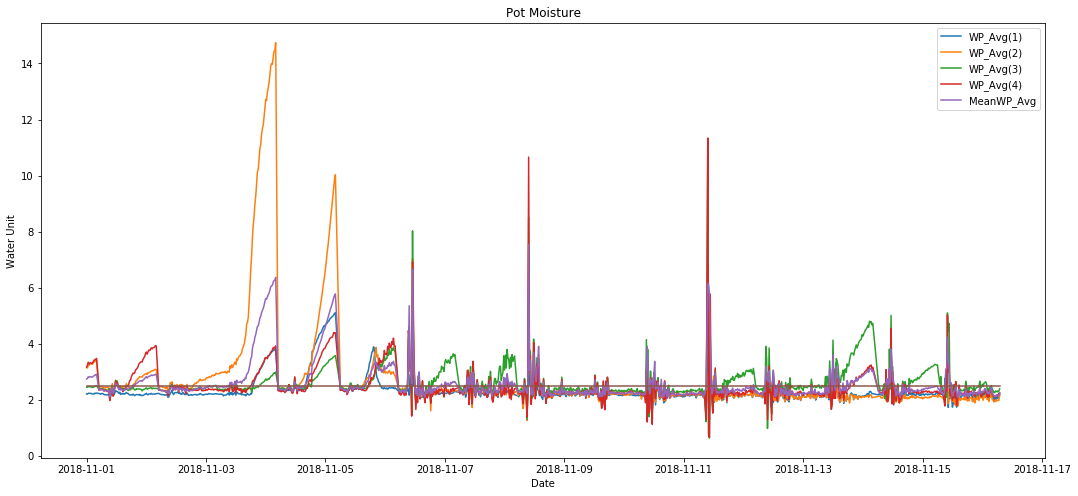

In [5]:
plt.figure(figsize=(18, 8));
plt.title('Pot Moisture');
Dat = PotWater.loc['2018-11-1':,:]
plt.plot(Dat);
plt.plot([Dat.index.min(),Dat.index.max()],[2.5,2.5])
#plt.ylim(1.5,5);
plt.xlabel('Date');
plt.ylabel('Water Unit');
plt.legend(PotWater, loc='best')

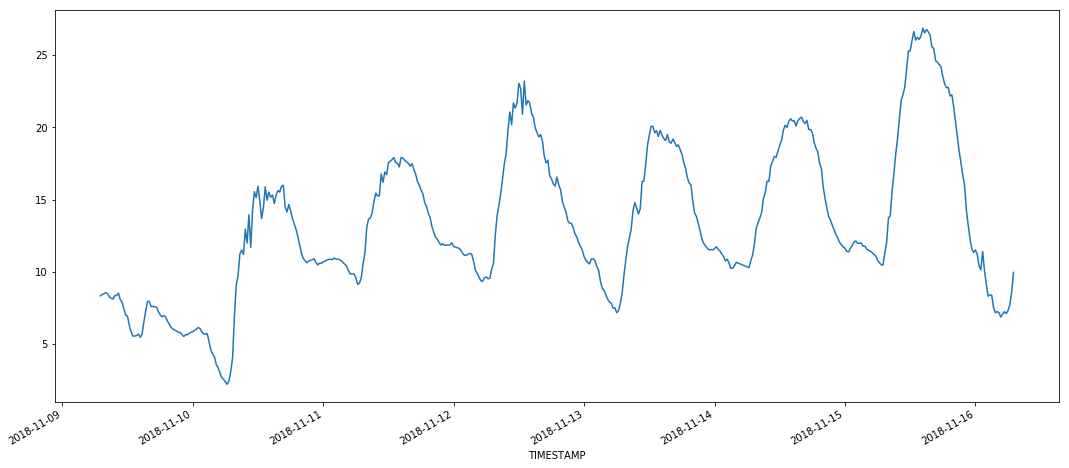

In [6]:
BiotronEnvironmentals.T107_C.loc[StartDate:EndDate].plot(figsize=(18,8))

In [7]:
BiotronEnvironmentals.loc['2018-10-24':'2018-10-25','LastGoodValue_Avg(1)']#.plot()

TIMESTAMP
2018-10-24 00:00:00    3.877
2018-10-24 00:20:00    3.950
2018-10-24 00:40:00    3.991
2018-10-24 01:00:00    4.030
2018-10-24 01:20:00    4.051
2018-10-24 01:40:00    4.055
2018-10-24 02:00:00    4.126
2018-10-24 02:20:00    4.147
2018-10-24 02:40:00    4.133
2018-10-24 03:00:00    4.154
2018-10-24 03:20:00    4.192
2018-10-24 03:40:00    4.230
2018-10-24 04:00:00    4.216
2018-10-25 22:40:00    2.262
2018-10-25 23:00:00    2.254
2018-10-25 23:20:00    2.255
2018-10-25 23:40:00    2.274
Name: LastGoodValue_Avg(1), dtype: float64

###Set up dataframes for temperature graphs

In [8]:
from datetime import timedelta #Import function needed for doing date deltas 
EndDate = BiotronEnvironmentals.index.max(axis=0)  #Set end of series as most recent date in file
EndDateString = EndDate.strftime("%Y-%m-%d")  #Turn this to a string
PlotDuration = 1                           #Set the duration that you want to graph for
StartDate = EndDate - timedelta(weeks=PlotDuration)       #Set start date the specified duration before the end date 
StartDateString = StartDate.strftime("%Y-%m-%d")           #Turn that into a string
PotTemps = BiotronEnvironmentals.ix[StartDateString:EndDateString,                     #create the dateframe for the specified period 
                                    [X for X in BiotronEnvironmentals if 'PotTemp' in X]]   #inserting only the colunms containing water potential data
SurfaceTemps = BiotronEnvironmentals.ix[StartDateString:EndDateString,                     #create the dateframe for the specified period 
                                    [X for X in BiotronEnvironmentals if 'TT_C' in X] ] 
Temps = pd.concat([SurfaceTemps, PotTemps],axis=1)  #JoinPotTemp and SurgaceTemp dataframes together

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


In [9]:
Temps.axes


[DatetimeIndex(['2018-11-09 00:00:00', '2018-11-09 00:20:00',
                '2018-11-09 00:40:00', '2018-11-09 01:00:00',
                '2018-11-09 01:20:00', '2018-11-09 01:40:00',
                '2018-11-09 02:00:00', '2018-11-09 02:20:00',
                '2018-11-09 02:40:00', '2018-11-09 03:00:00',
                ...
                '2018-11-16 04:00:00', '2018-11-16 04:20:00',
                '2018-11-16 04:40:00', '2018-11-16 05:00:00',
                '2018-11-16 05:20:00', '2018-11-16 05:40:00',
                '2018-11-16 06:00:00', '2018-11-16 06:20:00',
                '2018-11-16 06:40:00', '2018-11-16 07:00:00'],
               dtype='datetime64[ns]', name='TIMESTAMP', length=515, freq=None),
 Index([], dtype='object')]

In [10]:
Temps.shape

(515, 0)

##Draw graph of 30 min data

In [11]:
Temps.plot(figsize=(18,10),color=('r','y','y','b','g','b','g','g','b','b','b'))
plt.ylim(18,40);  
#plt.xlim(StartDate,EndDate)
plt.title('Pot temperatures');
plt.xlabel('Date');
plt.ylabel('Temperature');
plt.legend(loc='best')

TypeError: Empty 'DataFrame': no numeric data to plot

In [ ]:
PotTemps.plot(figsize=(18,10))
plt.ylim(18,40);
#plt.xlim(StartDate,EndDate)
plt.title('Pot temperatures');
plt.xlabel('Date');
plt.ylabel('Temperature');
plt.legend(loc='best')

##Draw graph of daily mean temperatures

In [ ]:
TempsDaily = Temps.resample('D', how='mean');
TempsDaily.ix[:,:11].plot(figsize=(18,10),color=('r','y','y','b','g','b','g','g','b','b','b'))
plt.ylim(18,30);
#plt.xlim(StartDate,EndDate)
plt.title('Pot temperatures');
plt.xlabel('Date');
plt.ylabel('Temperature');
plt.legend(loc='best')



In [ ]:
%matplotlib inline
BiotronEnvironmentals[['Irrigations_Avg', 'Irrigations2_Avg']].plot(legend=True, figsize=(14, 14));

In [ ]:
SurfaceTemps.plot(figsize=(18,10),color=('r','y','y','b','g','b','g','g','b','b','b'))
plt.ylim(18,40);  
#plt.xlim(StartDate,EndDate)
plt.title('Pot temperatures');
plt.xlabel('Date');
plt.ylabel('Temperature');
plt.legend(loc='best')